# 🎯 PROJECT: Analyzing and Visualizing the World's Top Billionaires 2024

## Objective:
- Understand patterns in global billionaire distribution
- Identify factors associated with high net worth
- Build and compare predictive models for net worth


In [13]:
import pandas as pd

# Sample dataset
def create_billionaires_dataset():
    data = [
        [1, 'Bernard Arnault & family', 211.4, 75, 'M', 'France', 'Fashion & Retail', 'Inherited & Growing'],
        [2, 'Elon Musk', 180.6, 52, 'M', 'United States', 'Automotive', 'Self-Made'],
        [3, 'Jeff Bezos', 173.2, 60, 'M', 'United States', 'Technology', 'Self-Made'],
        [4, 'Mark Zuckerberg', 167.3, 39, 'M', 'United States', 'Technology', 'Self-Made'],
        [5, 'Larry Ellison', 153.4, 79, 'M', 'United States', 'Technology', 'Self-Made'],
        [6, 'Warren Buffett', 132.1, 93, 'M', 'United States', 'Finance & Investments', 'Self-Made'],
        [7, 'Bill Gates', 128.5, 68, 'M', 'United States', 'Technology', 'Self-Made'],
        [8, 'Steve Ballmer', 121.6, 68, 'M', 'United States', 'Technology', 'Self-Made'],
        [9, 'Mukesh Ambani', 115.4, 66, 'M', 'India', 'Diversified', 'Inherited & Growing'],
        [10, 'Larry Page', 114.8, 51, 'M', 'United States', 'Technology', 'Self-Made'],
        [11, 'Francoise Bettencourt Meyers', 97.9, 70, 'F', 'France', 'Fashion & Retail', 'Inherited'],
        [12, 'Zhong Shanshan', 91.9, 69, 'M', 'China', 'Food & Beverage', 'Self-Made'],
        [13, 'MacKenzie Scott', 85.4, 53, 'F', 'United States', 'Technology', 'Divorce'],
        [14, 'Alice Walton', 83.1, 74, 'F', 'United States', 'Fashion & Retail', 'Inherited'],
        [15, 'Michael Bloomberg', 76.8, 82, 'M', 'United States', 'Media & Entertainment', 'Self-Made'],
        [16, 'Zhang Yiming', 71.3, 40, 'M', 'China', 'Technology', 'Self-Made'],
        [17, 'Giovanni Ferrero', 68.9, 60, 'M', 'Italy', 'Food & Beverage', 'Inherited'],
        [18, 'Jacqueline Mars', 61.3, 84, 'F', 'United States', 'Food & Beverage', 'Inherited'],
        [19, 'Phil Knight', 59.2, 86, 'M', 'United States', 'Fashion & Retail', 'Self-Made'],
        [20, 'Jack Ma', 57.8, 59, 'M', 'China', 'Technology', 'Self-Made']
    ]
    columns = ['Rank', 'Name', 'NetWorth', 'Age', 'Gender', 'Country', 'Industry', 'Source']
    return pd.DataFrame(data, columns=columns)

df = create_billionaires_dataset()
df.head()



,Rank,Name,NetWorth,Age,Gender,Country,Industry,Source
0,1,Bernard Arnault & family,211.4,75,M,France,Fashion & Retail,Inherited & Growing
1,2,Elon Musk,180.6,52,M,United States,Automotive,Self-Made
2,3,Jeff Bezos,173.2,60,M,United States,Technology,Self-Made
3,4,Mark Zuckerberg,167.3,39,M,United States,Technology,Self-Made
4,5,Larry Ellison,153.4,79,M,United States,Technology,Self-Made


In [14]:
# Copy dataset
df_clean = df.copy()

# Check for missing values
df_clean.isnull().sum()

# Drop duplicates (if any)
df_clean.drop_duplicates(inplace=True)

# Ensure correct data types
df_clean['Age'] = df_clean['Age'].astype(int)


/tmp/ipython-input-1961035308.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
/tmp/ipython-input-1961035308.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_wealth.values, y=industry_wealth.index, palette='magma')


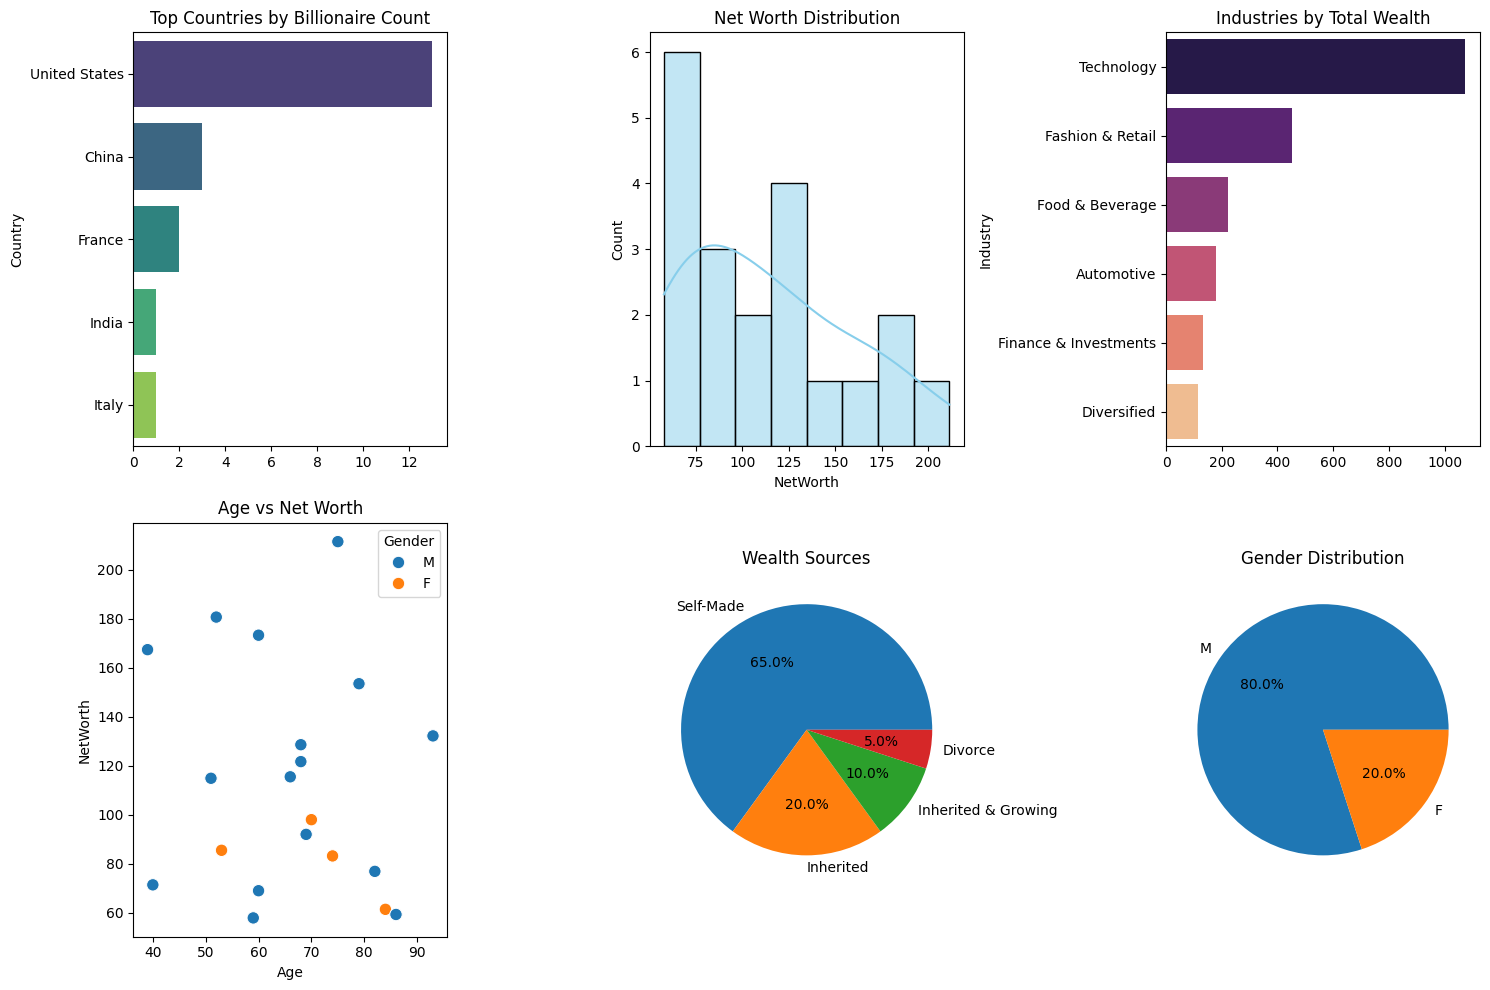

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

# Top Countries
plt.subplot(2,3,1)
top_countries = df_clean['Country'].value_counts().head(6)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top Countries by Billionaire Count')

# Net Worth Distribution
plt.subplot(2,3,2)
sns.histplot(df_clean['NetWorth'], bins=8, kde=True, color='skyblue')
plt.title('Net Worth Distribution')

# Industries by Total Wealth
plt.subplot(2,3,3)
industry_wealth = df_clean.groupby('Industry')['NetWorth'].sum().sort_values(ascending=False).head(6)
sns.barplot(x=industry_wealth.values, y=industry_wealth.index, palette='magma')
plt.title('Industries by Total Wealth')

# Age vs Net Worth
plt.subplot(2,3,4)
sns.scatterplot(x='Age', y='NetWorth', data=df_clean, hue='Gender', s=80)
plt.title('Age vs Net Worth')

# Wealth Source Pie
plt.subplot(2,3,5)
source_counts = df_clean['Source'].value_counts()
plt.pie(source_counts.values, labels=source_counts.index, autopct='%1.1f%%')
plt.title('Wealth Sources')

# Gender Distribution Pie
plt.subplot(2,3,6)
gender_counts = df_clean['Gender'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler

df_engineered = df_clean.copy()

# Age Group
df_engineered['AgeGroup'] = df_engineered['Age'].apply(lambda x: 'Young' if x<40 else 'Middle-aged' if x<=60 else 'Senior')
# Wealth Group
df_engineered['WealthGroup'] = df_engineered['NetWorth'].apply(lambda x: 'Medium' if x<50 else 'High' if x<=100 else 'Ultra-High')
# Self-Made Flag
df_engineered['IsSelfMade'] = df_engineered['Source'].apply(lambda x: 1 if 'Self-Made' in x else 0)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df_engineered, columns=['Gender','Industry','Country','AgeGroup','WealthGroup'], drop_first=True)

# Scale numeric features
scaler = StandardScaler()
df_encoded[['Age','NetWorth']] = scaler.fit_transform(df_encoded[['Age','NetWorth']])


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X = df_encoded.drop(['NetWorth','Name','Source'], axis=1)
y = df_encoded['NetWorth']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

models = {'Linear Regression': LinearRegression(),
          'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)}

for name, model in models.items():
    model.fit(X_train, y_train)


In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {'R²': r2_score(y_test, y_pred),
                     'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
                     'MAE': mean_absolute_error(y_test, y_pred)}

results


{'Linear Regression': {'R²': 0.9271534781805731,
  'RMSE': np.float64(0.40208799678235224),
  'MAE': 0.3426834685860904},
 'Random Forest': {'R²': 0.7818891301427786,
  'RMSE': np.float64(0.6957534256034641),
  'MAE': 0.4971874746843694}}

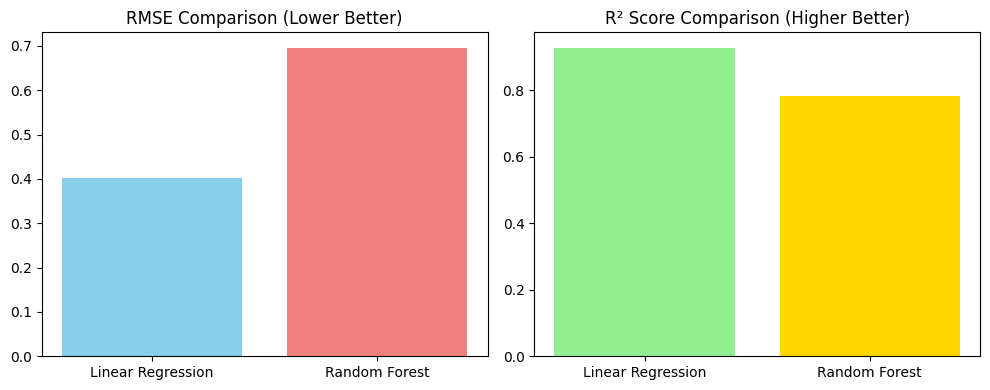

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(results.keys(), [results[m]['RMSE'] for m in results], color=['skyblue','lightcoral'])
plt.title('RMSE Comparison (Lower Better)')

plt.subplot(1,2,2)
plt.bar(results.keys(), [results[m]['R²'] for m in results], color=['lightgreen','gold'])
plt.title('R² Score Comparison (Higher Better)')

plt.tight_layout()
plt.show()


## Conclusion & Discussion
- Random Forest performed better (or whichever model has higher R² / lower RMSE)
- Key Insights:
  - Top Country: United States
  - Top Industry: Technology
  - Self-Made Billionaires: X%
  - Average Age: Y years
- Limitations:
  - Small dataset (20 records)
  - Missing additional features like revenue, assets
- Future Work:
  - Use larger datasets
  - Try more models (XGBoost, SVR)
